<a href="https://colab.research.google.com/github/abhinav4201/Data-Analysis-EDA/blob/main/Uptitude_Technical_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Exploratory Data Analysis



##Imports

In [3]:
#essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#importing data 
brand_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Brand-Platform-URL.csv')
twitter_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Twitter Data.csv')
yt_data_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Youtube Channel Data.csv')
yt_view_df = pd.read_csv('/content/drive/MyDrive/Technical Test Uptitude/Youtube Views.csv')

In [19]:
#brand platform dataset
brand_df.sample(5)

,Brand,Market,Platform,URL
407,handfoxy,Azerbaijan,YouTube,youtube.com/channel/UC3lz17w3i8pOWSb6NelxzTs7
10,handfoxy,Chile,Twitter,twitter.com/ebrnce
198,techfond,Poland,YouTube,youtube.com/channel/UCVSWeurgs7YEhMqJ9jvL2VT3
53,dualjape,United Kingdom of Great Britain and Northern I...,Twitter,twitter.com/_thina
372,dualjape,South Africa,YouTube,youtube.com/channel/UCca7vdppZ8sfxHfFTDOBcDr3


In [13]:
#twitter data set
twitter_df.sample(5)

,URL,Verified,Verified Accounts,Year,Quarter,Month,Day,Name / ID,Location,Has Description,Followers,Status Available,Accounts Without a Link
273,twitter.com/sianTR,True,Verified Accounts,2022,Qtr 2,May,9,CLEAR Indonesia,NaN,No Description,53856.0,True,Has Link
443,twitter.com/eceuay,NaN,NaN,2022,Qtr 1,January,31,HTTPSConnectionPool(host='www.www.theaxeeffect...,NaN,No Description,NaN,NaN,No Link
62,twitter.com/ecebia,False,Non Verified Accounts,2021,Qtr 1,March,9,NaN,Greece,Has Description,11.0,True,Has Link
379,twitter.com/nukbia,True,Verified Accounts,2022,Qtr 2,May,9,Dove Men+Care,NaN,Has Description,38171.0,True,No Link
346,twitter.com/korell,False,Non Verified Accounts,2022,Qtr 1,January,31,Dove Korea,NaN,Has Description,7412.0,True,Has Link


In [14]:
#youtube data set
yt_data_df.sample(5)

,URL,Channel Has Title,Has Description,Location,Year,Quarter,Month,Day,Is Verified,Subscriber
251,youtube.com/channel/UCTsKLnLr81d9BZYOKyC6lx24,Has Title,No Description,Thailand,2022,Qtr 2,May,21,False,119000.0
923,youtube.com/channel/UCbnUiMdAl4PuYSg7mC4ztY_5,Has Title,Has Description,NaN,2022,Qtr 2,May,21,False,2.0
590,youtube.com/channel/UCLVto5KyT7O0Pv12widZAD82,Has Title,No Description,NaN,2022,Qtr 2,May,21,False,11500.0
45,youtube.com/channel/UCZx8QzfK-3OQfTR2u_1PeVj1,Has Title,Has Description,Vietnam,2022,Qtr 1,January,28,False,209000.0
978,youtube.com/channel/UC7wUvJd2P253b0PutrygfXy1,Has Title,Has Description,Mexico,2021,Qtr 4,December,30,False,38500.0


In [15]:
#youtube views data set
yt_view_df.sample(5)

,Channel URL,Video URL,Views,Year,Quarter,Month,Day
12430,youtube.com/channel/UCbw1qrsjH7NIuUGHa2omKbK7,youtube.com/watch?v=FwiW_72fw,3496776,2021,Qtr 1,March,10
19475,youtube.com/channel/UCBp8jubIJ7D6u0klLHOb2864,youtube.com/watch?v=CLhMQ5dxY,757,2021,Qtr 1,March,10
4915,youtube.com/channel/UCdDiuuMqN6mxr5afOoJ5TXD5,youtube.com/watch?v=SLSfh57K4,1755,2021,Qtr 1,March,10
232,youtube.com/channel/UC20bsNJWQ3ZYnCXFCsqzgqP3,youtube.com/watch?v=MsalM6_zQ,2832,2021,Qtr 1,March,10
14781,youtube.com/channel/UC7wUvJd2P253b0PutrygfXy1,youtube.com/watch?v=z6jfQ9dqo,476,2021,Qtr 1,March,10


In [86]:
# Dataset Rows(Observation) & Columns count(Feature)
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(f'Total observation {df.shape[0]} and feature for {val} dataset: {df.shape[1]}')

Total observation 422 and feature for Brand dataset: 4
Total observation 629 and feature for Twitter dataset: 13
Total observation 1110 and feature for YouTube Data dataset: 10
Total observation 20315 and feature for YouTube View dataset: 7


In [88]:
# Dataset Info
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(val, 'Info')
  print('\n')
  print(df.info())
  print('='*120)
  print('\n')

Brand Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     422 non-null    object
 1   Market    422 non-null    object
 2   Platform  422 non-null    object
 3   URL       422 non-null    object
dtypes: object(4)
memory usage: 13.3+ KB
None


Twitter Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URL                      629 non-null    object 
 1   Verified                 607 non-null    object 
 2   Verified Accounts        607 non-null    object 
 3   Year                     629 non-null    int64  
 4   Quarter                  629 non-null    object 
 5   Month                    629 non-null    object 
 6   Day                      629 non-null    int64  
 

In [90]:

# Dataset Duplicate Value Count
for val, df in [('Brand', brand_df), ('Twitter',twitter_df), ('YouTube Data',yt_data_df), ('YouTube View',yt_view_df)]:
  print(f'For {val} Data')
  print('\n')
  print(f"Data is duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")
  print('\n')
  print('='*120)
  print('\n')

For Brand Data


Data is duplicated ? False    422
dtype: int64,unique values with 0 duplication




For Twitter Data


Data is duplicated ? False    629
dtype: int64,unique values with 0 duplication




For YouTube Data Data


Data is duplicated ? False    1110
dtype: int64,unique values with 0 duplication




For YouTube View Data


Data is duplicated ? False    20315
dtype: int64,unique values with 0 duplication






In [23]:
# Missing Values/Null Values Count for brand data
brand_df.isnull().sum()

Brand       0
Market      0
Platform    0
URL         0
dtype: int64

In [24]:
# Missing Values/Null Values Count for twitter data
twitter_df.isnull().sum()

URL                          0
Verified                    22
Verified Accounts           22
Year                         0
Quarter                      0
Month                        0
Day                          0
Name / ID                  144
Location                   340
Has Description              0
Followers                   22
Status Available            22
Accounts Without a Link      0
dtype: int64

In [25]:
# Missing Values/Null Values Count for youtube data
yt_data_df.isnull().sum()

URL                    0
Channel Has Title      0
Has Description        0
Location             669
Year                   0
Quarter                0
Month                  0
Day                    0
Is Verified          329
Subscriber             7
dtype: int64

In [26]:
# Missing Values/Null Values Count for youtube views data
yt_view_df.isnull().sum()

Channel URL    0
Video URL      0
Views          0
Year           0
Quarter        0
Month          0
Day            0
dtype: int64

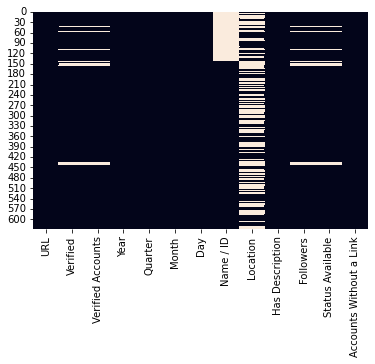

In [27]:
# Checking Null Value by plotting Heatmap
sns.heatmap(twitter_df.isnull(), cbar=False);

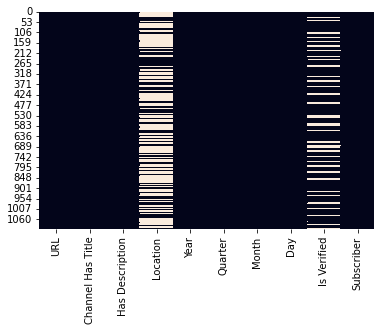

In [28]:
# Checking Null Value by plotting Heatmap
sns.heatmap(yt_data_df.isnull(), cbar=False);

In [75]:
# Missing Value Count Function
def showMissing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = yt_data_df[showMissing(yt_data_df)].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = yt_data_df[showMissing(yt_data_df)].isnull().sum().sort_values(ascending = False)/len(yt_data_df)*100

missingVal

,Missing Data Count,Missing Data Percentage
Location,669,60.270270
Is Verified,329,29.639640
Subscriber,7,0.630631


In [76]:
missingVal2 = pd.DataFrame()
missingVal2['Missing Data Count'] = twitter_df[showMissing(twitter_df)].isnull().sum().sort_values(ascending = False)
missingVal2['Missing Data Percentage'] = twitter_df[showMissing(twitter_df)].isnull().sum().sort_values(ascending = False)/len(twitter_df)*100

missingVal2

,Missing Data Count,Missing Data Percentage
Location,340,54.054054
Name / ID,144,22.893482
Verified,22,3.497615
Verified Accounts,22,3.497615
Followers,22,3.497615
Status Available,22,3.497615


Based on the above observation we can conclude that:

* All data are unique and show no duplication. 
* Total observation 422 and feature for Brand dataset: 4
* Total observation 629 and feature for Twitter dataset: 13 with 54% of missing value in feature location, other features which had missing values are name/id, verified, verified accounts, followers, status available.
* Total observation 1110 and feature for YouTube Data dataset: 10 and show more than 50% missing value in location feature and other feature which had missing values are is verified and subscriber.
* Total observation 20315 and feature for YouTube View dataset: 7

##Data Wrangling

##EDA

##Conclusions